### load packages

In [1]:
# for automatic reloading of modules (quick debugging)
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append('..') # add parent directory to path

import numpy as np 
import pandas as pd
from utils import processing as pr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ! pip install pyarrow fastparquet tqdm seaborn

### load data for range of time of choice
Here, we load data only for three months from 01-2023 to 03-2023. The function that I use loads the data for each month and year, performs some minimal processing (drop rows with dates outside the desired range), and bins the raw pickup ride data to an hourly count time series. At the end, we concatenate the dataframes corresponding to each month and year.

In [3]:
# preprocess months and years to an (N,2)-array
months = np.arange(1,3+1,1)
years = np.arange(2023,2023+1,1)
month_year = np.meshgrid(years, months)
month_year = np.array(month_year).T.reshape(-1,2)

In [4]:
# generate data
ts = pr.generate_processed_data(month_year, vehicle_type='yellow')
ts.head()

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:09<00:00,  3.02s/it]


,PULocationID,pickup_datetime,counts
0,1,2023-01-01 00:00:00-05:00,0.0
1,2,2023-01-01 00:00:00-05:00,0.0
2,3,2023-01-01 00:00:00-05:00,0.0
3,4,2023-01-01 00:00:00-05:00,14.0
4,5,2023-01-01 00:00:00-05:00,0.0


In [5]:
# basic checks, notice our code accounts for Daylight Savings Time
print('Min Date: ', ts.pickup_datetime.min())
print('Max Date: ', ts.pickup_datetime.max())
print('Taxi Zones: ' + str(ts.PULocationID.unique().min()) + ' to ' + str(ts.PULocationID.unique().max()) )
print('Memory Usage (MB): ', ts.memory_usage().sum() / 1024**2)

Min Date:  2023-01-01 00:00:00-05:00
Max Date:  2023-03-31 23:00:00-04:00
Taxi Zones: 1 to 265
Memory Usage (MB):  12.68448257446289


### obtain time series for a single time zone (East Village)

<Axes: xlabel='pickup_datetime'>

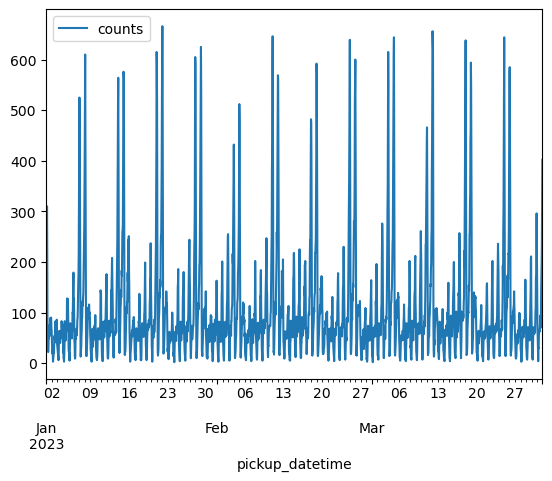

In [6]:
ts_1 = ts[ts['PULocationID'] == 79]
ts_1.plot(x = 'pickup_datetime', y = 'counts')

In [35]:
# save time series as pd dataframe
os.system('mkdir -p data/test')
ts.to_pickle('data/test/counts_yellow_2023-01_2023-03.pkl')


In [36]:
# check if saved data is the same as the original
ts_test = pd.read_pickle('data/test/counts_yellow_2023-01_2023-03.pkl')
(ts_test == ts).all().all()

True